In [1]:
#packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
sales_data = pd.read_excel("D:\Sales Forecast\Sales_Forecast_Data.xlsx",header = 0)

In [3]:
sales_data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


Here, we have data from many companies but we have been asked to forecast for ABC manufacturing company. So, we will make separate dataframe which contains data related to ABC manufacturing only.

In [4]:
sales_data.COMPANY.unique()

array(['monous ', 'kadoo ', 'cynoid ', 'exicious ', 'venible ',
       'intravu ', 'ABC Manufacturing', 'disescent ', 'janu ',
       'idiombee ', 'scire ', 'trita ', 'zooloo ', 'unimm ', 'archile ',
       'interosis ', 'flimbo ', 'agizu ', 'oyofix ', 'socimbee ',
       'unent ', 'hemify ', 'avape ', 'domise ', 'centicee ', 'biore ',
       'munder ', 'insulescent ', 'transescent ', 'yore ', 'hypomba ',
       'ament ', 'suroid ', 'alboid ', 'canill ', 'esose ', 'inent ',
       'falcize ', 'verous ', 'comible ', 'polyic ', 'luper ',
       'electrotude ', 'calcise ', 'subism ', 'maler ', 'dominive '],
      dtype=object)

In [5]:
sales_ABC = sales_data[sales_data["COMPANY"]== 'ABC Manufacturing']

In [6]:
sales_ABC.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


Let me check for NA and duplicate values.

In [7]:
sales_ABC.isna().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [8]:
sales_ABC.duplicated().sum()

2197

In [9]:
sales_ABC.drop_duplicates(keep = "first", inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sales_ABC.shape

(26443, 7)

We have been asked to forecast sale of pesticide for ABC manufacturing company in each of the state.

In [11]:
sales_ABC.STATE.unique()

array(['Haryana', 'Himachal Pradesh', 'Punjab', 'Uttar Pradesh',
       'Uttarakhand'], dtype=object)

We will forecast for only one state because procedure will be same for each state. Let us select Uttar Pradesh.

In [12]:
sales_UP = sales_ABC[sales_ABC["STATE"]== 'Uttar Pradesh']

In [13]:
sales_UP.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
2263,2014-2015,Apr,Uttar Pradesh,Insecticides,Rae Bareli,ABC Manufacturing,978.075
2264,2014-2015,Apr,Uttar Pradesh,Insecticides,Etawah,ABC Manufacturing,39.015
2265,2014-2015,Apr,Uttar Pradesh,Insecticides,Kanpur Dehat,ABC Manufacturing,0.000
2266,2014-2015,Apr,Uttar Pradesh,Insecticides,Kanpur Nagar,ABC Manufacturing,196.965
2267,2014-2015,Apr,Uttar Pradesh,Insecticides,Jalaun,ABC Manufacturing,515.700


We are only interested in Time and Value variables for forecasting purpose. So, we will drop rest of variables.

In [14]:
UP=sales_UP.drop(['STATE', 'FG', 'DISTRICT', 'COMPANY'],axis=1)

In [15]:
UP.head()

,FIN_YEAR,MONTH,VALUE
2263,2014-2015,Apr,978.075
2264,2014-2015,Apr,39.015
2265,2014-2015,Apr,0.000
2266,2014-2015,Apr,196.965
2267,2014-2015,Apr,515.700


In [16]:
UP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 2263 to 230147
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIN_YEAR  13024 non-null  object 
 1   MONTH     13024 non-null  object 
 2   VALUE     13024 non-null  float64
dtypes: float64(1), object(2)
memory usage: 407.0+ KB


Here, FIN_YEAR and MONTH are given as object. We need a variable in datetime format, which we can utilize as index. So, we will create a variable, which will be in datetime format by using FIN_YEAR and MONTH.

In [17]:
list1 = list(UP.index)

In [18]:
for i in list1:
    if UP.loc[i,"MONTH"] in ["Jan","Feb","Mar"]:
       UP.loc[i,"DATE"] = UP.loc[i,"FIN_YEAR"][5:] + "-" + UP.loc[i,"MONTH"]
    else:
       UP.loc[i,"DATE"] = UP.loc[i,"FIN_YEAR"][:4] + "-" + UP.loc[i,"MONTH"]

As we know that financial year starts from april and ends in march. So, in above code if MONTH in ("jan", "feb", "march") then it will take second year from FIN_YEAR(for example MONTH = "Jan" and FIN_YEAR = "2014-2015" then DATE ="2015-Jan").

In [19]:
UP.head()

,FIN_YEAR,MONTH,VALUE,DATE
2263,2014-2015,Apr,978.075,2014-Apr
2264,2014-2015,Apr,39.015,2014-Apr
2265,2014-2015,Apr,0.000,2014-Apr
2266,2014-2015,Apr,196.965,2014-Apr
2267,2014-2015,Apr,515.700,2014-Apr


In [20]:
UP["DATE"] = pd.to_datetime(UP["DATE"])

This will convert object variable into datetime variable. Notice that in our original DATE variable we have just month and year and no specific day, so this code will assign 1st day of month to each observation.

In [21]:
UP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 2263 to 230147
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FIN_YEAR  13024 non-null  object        
 1   MONTH     13024 non-null  object        
 2   VALUE     13024 non-null  float64       
 3   DATE      13024 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


Now we don't need FIN_YEAR and MONTH to forecast. So, we will create new df which will be having DATE and VALUE variables.

In [22]:
UP_final_df = UP[["DATE","VALUE"]]

In [23]:
UP_final_df.head()

,DATE,VALUE
2263,2014-04-01,978.075
2264,2014-04-01,39.015
2265,2014-04-01,0.000
2266,2014-04-01,196.965
2267,2014-04-01,515.700


Here we have many observations which have same date. We will apply groupby function on DATE variable and sum on value variable. So that we can get total monthly sale for specific month. For example 2014-04-01,after applying groupby and sum functions, will represent total sale in month of april in 2014.

In [24]:
UP_final_df = UP_final_df.sort_values("DATE",ascending = True)

In [25]:
UP_final_df = UP_final_df.groupby("DATE")["VALUE"].sum().reset_index()

In [27]:
UP_final_df.head()

,DATE,VALUE
0,2014-04-01,142695.000
1,2014-05-01,395083.710
2,2014-06-01,553862.070
3,2014-07-01,720928.080
4,2014-08-01,1103308.965


You can see that our data is equally spaced and in chronological order. which is necessary for time series analysis.

We are going to set DATE variable as index. That index we will use in our model.

In [28]:
UP_final_df = UP_final_df.set_index("DATE")

Let us define new variable y for our convenience.

In [29]:
y = UP_final_df["VALUE"]

In [30]:
y

DATE
2014-04-01     142695.000
2014-05-01     395083.710
2014-06-01     553862.070
2014-07-01     720928.080
2014-08-01    1103308.965
2014-09-01     752904.720
2014-10-01     708021.540
2014-11-01    1431476.820
2014-12-01    1049625.270
2015-01-01     817419.600
2015-02-01     662409.630
2015-03-01    1641843.540
2015-04-01     503665.560
2015-05-01     711111.285
2015-06-01     700414.290
2015-07-01     914662.530
2015-08-01     824892.660
2015-09-01     825032.385
2015-10-01     660813.660
2015-11-01     935888.850
2015-12-01     845433.045
2016-01-01     789729.885
2016-02-01     541337.310
2016-03-01    2039066.595
2016-04-01     239000.760
2016-05-01     572291.325
2016-06-01     531000.900
2016-07-01     567115.020
2016-08-01     737854.650
2016-09-01     597814.560
2016-10-01     405397.035
2016-11-01     907754.040
2016-12-01     831337.992
2017-01-01     827758.980
2017-02-01     581322.015
2017-03-01    1414752.183
2017-04-01     132897.240
2017-05-01     516515.670
2017-06

Let us divide data into train and test for validation purpose.

In [31]:
train = UP_final_df.loc[:"2017-03-01"]["VALUE"]
test = UP_final_df.loc["2017-04-01":]["VALUE"]

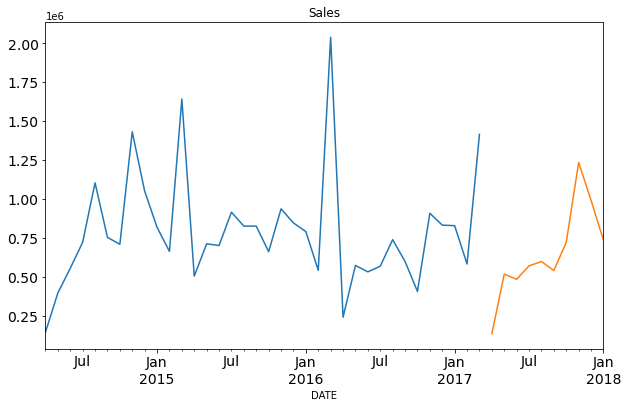

In [32]:
train.plot(figsize=(10,6), title = "Sales", fontsize=14)
test.plot(figsize=(10,6), title = "Sales", fontsize=14)
plt.show()

Let us first decompose data to know which order smoothing or model will be required for our data.

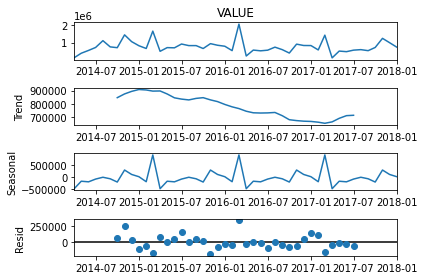

In [33]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()

As we can see from above decomposition that downward trend and seasonality is present with period of 12 months. So, we will apply holt_winter model.  

Let us first validate our model.

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


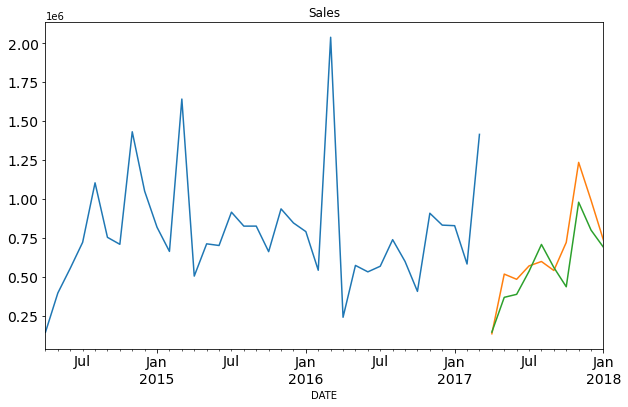

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing
holt_winter_df = test.copy()
fit1 = ExponentialSmoothing(train,seasonal_periods =12,trend = "add",seasonal = "add").fit()
holt_winter_df["Holt_Winter"] = fit1.forecast(steps = 10)
train.plot(figsize=(10,6), title = "Sales", fontsize=14)
test.plot(figsize=(10,6), title = "Sales", fontsize=14)
holt_winter_df["Holt_Winter"].plot(figsize=(10,6), title = "Sales", fontsize=14)
plt.show()

Orange line represents test data and green line represents predicted data.

Let us check RMSE.

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,holt_winter_df["Holt_Winter"]))
print(rms)

152000.06620526066


Now we have completed with validation. Let us forecast for next 10 months.

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


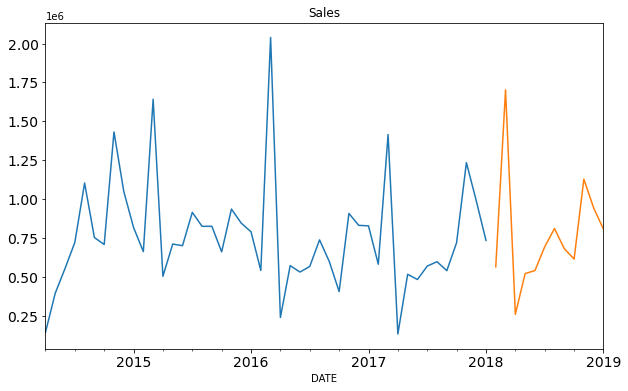

In [38]:
fit1 = ExponentialSmoothing(y,seasonal_periods =12, trend ="add", seasonal = "add").fit()
Y_predictions = fit1.forecast(steps =12)
y.plot(figsize=(10,6),title = "Sales",fontsize=14)
Y_predictions.plot(figsize =(10,6),title = "Sales",fontsize=14)
plt.show()

In similar manner we can do forecasting for other states as well.